In [24]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

This is a dataset for all election data for the 2018 midterms in the United States. It also includes the data from the 2016 and 2012 presidential elections on the county level.

In [2]:
#Read in data, sanity check the data
election = pd.read_csv("https://raw.githubusercontent.com/MEDSL/2018-elections-unoffical/master/election-context-2018.csv",
                      sep = ",", header=0)
election.describe()

,fips,trump16,clinton16,otherpres16,romney12,obama12,otherpres12,demsen16,repsen16,othersen16,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
count,3114.000000,3114.000000,3.114000e+03,3114.000000,3114.000000,3.114000e+03,3114.000000,1.942000e+03,1942.000000,1942.000000,...,3111.000000,3111.000000,3111.00000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3113.000000,3113.000000
mean,30660.117855,20171.786448,2.110600e+04,2459.164419,19433.805716,2.106226e+04,839.764611,2.574812e+04,19936.436148,1790.051493,...,37.342346,17.634368,47817.63838,7.064097,14.225599,79.216478,11.044488,77.001023,58.470368,4.984260
std,14984.811176,43162.140286,8.052001e+04,7514.783991,44577.392198,7.401418e+04,2949.902265,1.062836e+05,38095.362416,5114.666594,...,5.439730,4.442080,12482.36596,3.228842,6.543414,9.138770,5.327779,10.358919,31.459458,2.702364
min,1001.000000,0.000000,0.000000e+00,0.000000,54.000000,5.000000e+00,0.000000,8.000000e+00,0.000000,0.000000,...,11.842105,3.854570,18972.00000,0.000000,1.278772,19.789880,0.000000,9.188199,0.000000,1.000000
25%,19039.500000,3216.250000,1.170000e+03,183.000000,2909.000000,1.553000e+03,74.000000,1.571000e+03,3225.750000,90.000000,...,34.163145,14.831727,39681.00000,4.952997,9.307582,75.317416,7.231642,72.886802,33.197178,2.000000
50%,29210.000000,7239.500000,3.178000e+03,499.000000,6445.500000,3.999000e+03,179.000000,4.024500e+03,7045.500000,399.000000,...,37.000969,17.280145,46250.00000,6.761641,12.773185,81.474694,9.938900,79.452055,59.412038,6.000000
75%,46006.500000,17886.000000,9.827750e+03,1674.000000,16315.250000,1.134850e+04,529.750000,1.320750e+04,18261.250000,1367.500000,...,39.984573,19.933773,53563.50000,8.774941,18.307272,85.567853,13.947282,83.918746,87.012987,7.000000
max,56045.000000,769743.000000,2.464364e+06,200201.000000,885333.000000,2.216903e+06,78831.000000,3.113911e+06,529781.000000,100877.000000,...,70.981316,53.106375,125672.00000,29.927415,51.479358,97.014925,41.758287,95.918367,100.000000,9.000000


We can see in the summary statistic table that the max is much higher for Clinton and Obama than for Trump or Romney. At the same time, the median is higher for Trump and Romney. This suggests that Clinton and Obama had very high-population counties go their way while Trump and Romney won smaller counties.

In [3]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 39 columns):
state                     3114 non-null object
county                    3114 non-null object
fips                      3114 non-null int64
trump16                   3114 non-null int64
clinton16                 3114 non-null int64
otherpres16               3114 non-null int64
romney12                  3114 non-null int64
obama12                   3114 non-null int64
otherpres12               3114 non-null int64
demsen16                  1942 non-null float64
repsen16                  1942 non-null float64
othersen16                1942 non-null float64
demhouse16                2862 non-null float64
rephouse16                2862 non-null float64
otherhouse16              2862 non-null float64
demgov16                  601 non-null float64
repgov16                  601 non-null float64
othergov16                601 non-null float64
repgov14                  2148 non-null float64


In [4]:
#Make sure all 50 states are represented
election['state'].unique().size

50

Check to make sure there are no mistakenly large counties that would skew the data.

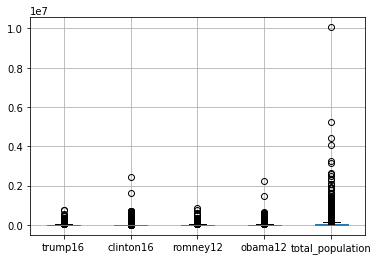

In [5]:
election[['trump16', 'clinton16', 'romney12', 'obama12', 'total_population']].boxplot()

Total population was expected to be the largest and it was. The numbers are consistent with what we would expect counties to have in population.

Now we will visualise the data and see what story it tells.

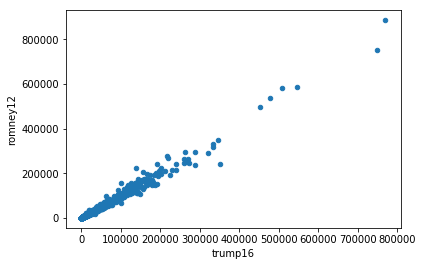

In [13]:
election.plot(x = 'trump16', y = 'romney12', kind = 'scatter')

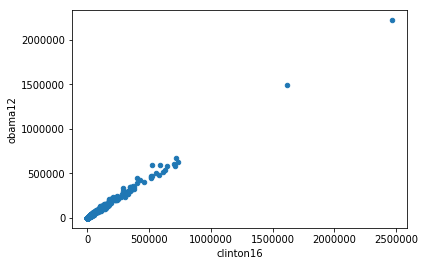

In [14]:
election.plot(x = 'clinton16', y = 'obama12', kind = 'scatter')

Let's now visualise the counties that Trump won compared with those that Clinton won.

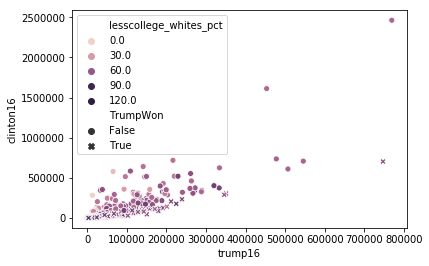

In [35]:
election['TrumpWon'] = election['trump16'] > election['clinton16']
sns.scatterplot(x = 'trump16', y = 'clinton16', style = 'TrumpWon', hue = 'lesscollege_whites_pct', data = election)

Clearly those counties with higher percentages of non-college educated whites swung more in favor of Donald Trump than of Hillary Clinton.